这下面是每个州的公司数量和平均薪资的关系

In [38]:
import json
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
from pandas.core.frame import DataFrame


In [39]:
dir = "C:/Users/YH/Documents/Code/python/IC/IC_DSI_Project/Project_salary/web/json/demo2.json"
with open(dir, 'r', encoding='utf-8') as LoadF:
    LoadDict = json.load(LoadF)

# TODO:
AbbMapping = {'WV': 'West Virginia', 'PR': 'Puerto Rico', 'HI': 'Hawaii', 'IA': 'Iowa', 'IL': 'Illinois', 'KS': 'Kansas', 'MA': 'Massachusetts', 'AL': 'Alabama', 'NY': 'New York', 'CO': 'Colorado', 'MT': 'Montana', 'NM': 'New Mexico', 'OK': 'Oklahoma', 'SD': 'South Dakota', 'VA': 'Virginia', 'GA': 'Georgia', 'DE': 'Delaware', 'ID': 'Idaho', 'KY': 'Kentucky', 'MI': 'Michigan', 'NV': 'Nevada', 'NC': 'North Carolina', 'NE': 'Nebraska', 'AK': 'Alaska', 'CA': 'California', 'OR': 'Oregon', 'TN': 'Tennessee',
              'WA': 'Washington', 'IN': 'Indiana', 'ME': 'Maine', 'MS': 'Mississippi', 'NH': 'New Hampshire', 'LA': 'Louisiana', 'MN': 'Minnesota', 'OH': 'Ohio', 'AZ': 'Arizona', 'CT': 'Connecticut', 'PA': 'Pennsylvania', 'TX': 'Texas', 'FL': 'Florida', 'MD': 'Maryland', 'MO': 'Missouri', 'NJ': 'New Jersey', 'SC': 'South Carolina', 'VT': 'Vermont', 'AR': 'Arkansas', 'RI': 'Rhode Island', 'ND': 'North Dakota', 'UT': 'Utah', 'WY': 'Wyoming', 'WI': 'Wisconsin', 'DC': 'District of Columbia'}
DataDir = "C:/Users/YH/Documents/Code/python/IC/IC_DSI_Project/Project_salary/data/data_cleaned_2021.csv"
df = pd.read_csv(DataDir)


In [40]:

df_loc = df['Job Location']
# DfLocFull = [AbbMapping.get(i.split(', ')[1]) for i in df_loc]
DfLocFull = [AbbMapping.get(i) for i in df_loc]
JobLocCnt = {}
for key, value in AbbMapping.items():
    JobLocCnt[value] = 0
for i in DfLocFull:
    JobLocCnt[i] = JobLocCnt.get(i, 0) + 1
DfSaLoc = df.iloc[:, [19, 21]]
for i in range(0, DfSaLoc.shape[0]):
    DfSaLoc.iloc[i, DfSaLoc.columns.get_loc(
        "Job Location")] = AbbMapping[DfSaLoc.iloc[i, DfSaLoc.columns.get_loc("Job Location")]]
AvgSalary = {value: 0 for key, value in AbbMapping.items()}
for index, row in DfSaLoc.iterrows():
    AvgSalary[row["Job Location"]] += row["Avg Salary(K)"]
for key, value in AvgSalary.items():
    if(JobLocCnt[key]):
        AvgSalary[key] /= JobLocCnt[key]


C:\Users\YH\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:

df_cmloc = df['Location']
DfLocFull = [AbbMapping.get(i.split(', ')[1]) for i in df_cmloc]
# DfLocFull = [AbbMapping.get(i) for i in df_loc]
CompanyCnt = {}
for key, value in AbbMapping.items():
    CompanyCnt[value] = 0
for i in DfLocFull:
    CompanyCnt[i] = CompanyCnt.get(i, 0) + 1

c = {'avg': AvgSalary, 'ccnt': CompanyCnt}
df_re = DataFrame(c)


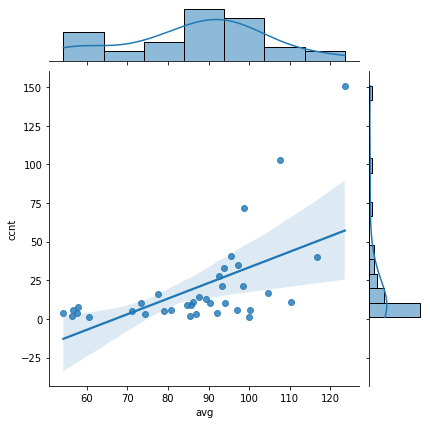

In [43]:
sns.jointplot(x='avg', y='ccnt',
              data=df_re.query('avg>0 and ccnt>0',inplace=False), kind='reg')
